Contents of main.py

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from model import CNN_GSGD, GSGDOptimizer
from train import train, test
import os
import torch.nn as nn
from torch.utils.data import random_split

# Data loading, model setup, and main training loop code here

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

HISTOGRAM

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

# Path to the ZIP file
zip_file_path = '/content/drive/My Drive/Soft Computing Resources/AlgX3_64x64_merged_tensors_with_labels.zip'
extract_path = '/content/'

# Verify if the ZIP file exists
if not os.path.exists(zip_file_path):
    raise FileNotFoundError(f"File not found: {zip_file_path}")

# Copy the ZIP file to Colab
!cp "{zip_file_path}" /content

# Unzip the file
with zipfile.ZipFile('/content/AlgX3_64x64_merged_tensors_with_labels.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/drive


In [ ]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the path to the folder where your images are stored
data_path = '/content/AlgX3_64x64_merged_tensors_with_labels'  # Update this with the path to your images

# Step 1: Set up transformations (similar to MNIST preprocessing)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale if needed
    # transforms.Resize((28, 28)),  # Resize to 28x28 to match MNIST dimensions, adjust if needed
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to match MNIST-like preprocessing
])

# Step 2: Load the entire dataset using ImageFolder
full_dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Step 3: Get input size dynamically from the first image in the dataset
sample_image, _ = full_dataset[0]  # Take the first image to determine the input shape
input_size = sample_image.shape  # This will be (C, H, W)

# Step 4: Split the dataset into training and testing sets
train_size = int(0.8 * len(full_dataset))  # 80% for training
test_size = len(full_dataset) - train_size  # Remaining 20% for testing
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Step 5: Create DataLoaders for both sets
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Split the train_dataset into training and validation datasets
train_size = int(0.8 * len(train_dataset))  # 80% for training
validation_size = len(train_dataset) - train_size  # Remaining 20% for validation
train_dataset, validation_dataset = random_split(train_dataset, [train_size, validation_size])

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_GSGD(input_size=input_size, num_classes=len(full_dataset.classes)).to(device)

# model = EnhancedCNN_GSGD(num_classes=len(full_dataset.classes)).to(device)


# For Standard Guided SGD
# optimizer = GSGDOptimizer(model.parameters(), lr=0.01, method='sgd')

# For Guided SGD with Momentum
optimizer = GSGDOptimizer(model.parameters(), lr=0.01, method='momentum', momentum=0.9)

# For Guided Adam
# optimizer = GSGDOptimizer(model.parameters(), lr=0.001, method='adam', beta1=0.9, beta2=0.999)



In [ ]:
# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Run training for each epoch, passing the dataset instead of DataLoader
for epoch in range(1, 30):
    train(model, device, train_loader.dataset, validation_loader.dataset, optimizer, epoch, loss_fn,
      verification_set_num=4, rho=10, log_interval=9)
    # train(model, device, train_loader.dataset, optimizer, epoch, loss_fn)  # Pass train_loader.dataset
    test(model, device, test_loader)

Epoch: 1, Iteration: 1, Loss: 0.694645
Epoch: 1, Iteration: 10, Loss: 0.670210
Epoch: 1, Iteration: 19, Loss: 0.585004
Epoch: 1, Iteration: 28, Loss: 0.443902
Epoch: 1, Iteration: 37, Loss: 0.504881
Epoch: 1, Iteration: 46, Loss: 0.462726
Epoch: 1, Iteration: 55, Loss: 0.500836
Epoch: 1, Iteration: 64, Loss: 0.603422
Epoch: 1, Iteration: 73, Loss: 0.312216
Epoch 1 completed.

Test set: Average loss: 0.0005, Accuracy: 1277/1547 (83%)

Epoch: 2, Iteration: 1, Loss: 0.563762
Epoch: 2, Iteration: 10, Loss: 0.467591
Epoch: 2, Iteration: 19, Loss: 0.514833
Epoch: 2, Iteration: 28, Loss: 0.432840
Epoch: 2, Iteration: 37, Loss: 0.454269
Epoch: 2, Iteration: 46, Loss: 0.432282
Epoch: 2, Iteration: 55, Loss: 0.321055
Epoch: 2, Iteration: 64, Loss: 0.325635
Epoch: 2, Iteration: 73, Loss: 0.289064
Epoch 2 completed.

Test set: Average loss: 0.0004, Accuracy: 1313/1547 (85%)

Epoch: 3, Iteration: 1, Loss: 0.285654
Epoch: 3, Iteration: 10, Loss: 0.372033
Epoch: 3, Iteration: 19, Loss: 0.388949
Epoch

In [ ]:
# Save the trained model
model_save_path = '/content/histogram_model.pth'  # Path where you want to save the model
torch.save(model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')

Model saved to /content/histogram_model.pth


<ipython-input-16-4ae14c43a8ba>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/histogram_model.pth'))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       779
           1       0.96      0.87      0.91       768

    accuracy                           0.92      1547
   macro avg       0.92      0.92      0.92      1547
weighted avg       0.92      0.92      0.92      1547



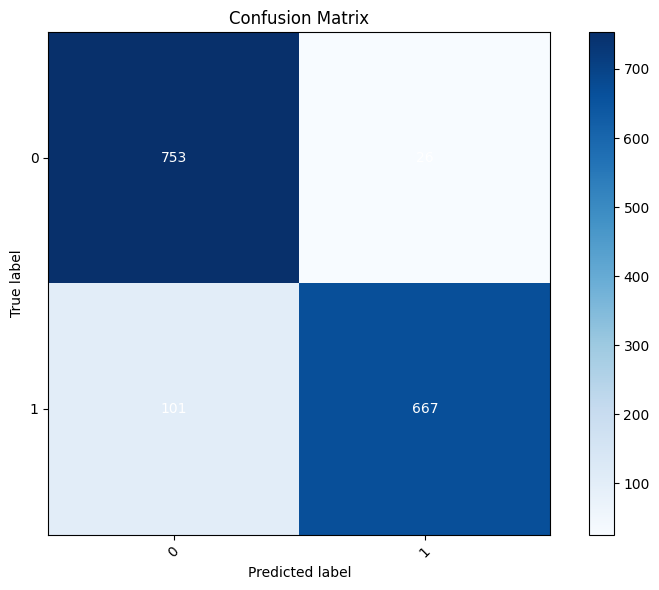

Confusion Matrix:
[[753  26]
 [101 667]]

ROC Values:
Class 1: AUC = 0.98


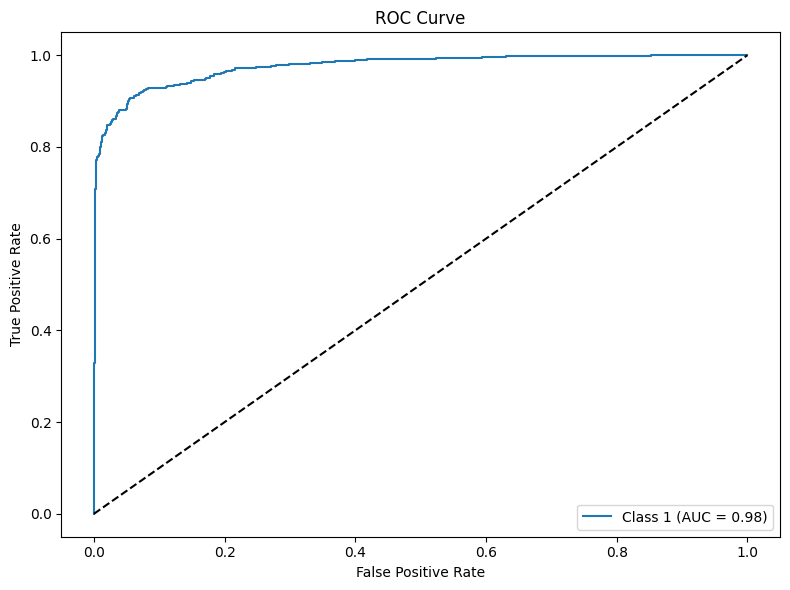

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import torch.nn.functional as F  # For softmax

# Load the trained model
model = CNN_GSGD(input_size=input_size, num_classes=len(full_dataset.classes)).to(device)
model.load_state_dict(torch.load('/content/histogram_model.pth'))
model.eval()

# Get predictions and true labels for the test set
all_preds = []
all_labels = []
all_preds_prob = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, preds = torch.max(output, 1)  # Get predictions
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(target.cpu().numpy())
        all_preds_prob.extend(F.softmax(output, dim=1).cpu().numpy())  # Store probabilities

# Classification Report
print("Classification Report:")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
cf_matrix = confusion_matrix(all_labels, all_preds)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = list(full_dataset.classes)  # Assuming the class labels are present in the dataset
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add annotations to the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cf_matrix[i, j]), ha='center', va='center', color='white')

plt.tight_layout()
plt.show()  # Display confusion matrix plot

# Print Confusion Matrix values
print("Confusion Matrix:")
print(cf_matrix)

# Determine if it's binary or multi-class
is_binary = len(classes) == 2  # If there are only two classes, it's binary classification

# Compute ROC Curve and AUC
lb = LabelBinarizer()
all_labels_bin = lb.fit_transform(all_labels)  # Convert labels to binary format

fpr = dict()
tpr = dict()
roc_auc = dict()

if is_binary:
    # For binary classification, we only need the positive class (class 1)
    fpr, tpr, _ = roc_curve(all_labels_bin, np.array(all_preds_prob)[:, 1])  # Get probabilities for class 1
    roc_auc = auc(fpr, tpr)
else:
    # For multi-class classification, compute ROC for each class
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], np.array(all_preds_prob)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Print ROC values
print("\nROC Values:")
if is_binary:
    print(f'Class 1: AUC = {roc_auc:.2f}')
else:
    for i in range(len(classes)):
        print(f'Class {classes[i]}: AUC = {roc_auc[i]:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
if is_binary:
    plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})')
else:
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (no discrimination)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()  # Display ROC curve plot


BAR GRAPHS

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

# Path to the ZIP file
zip_file_path = '/content/drive/My Drive/Heatmaps/bargraphs.zip'
extract_path = '/content/bargraphs'

# Verify if the ZIP file exists
if not os.path.exists(zip_file_path):
    raise FileNotFoundError(f"File not found: {zip_file_path}")

# Copy the ZIP file to Colab
!cp "{zip_file_path}" /content

# Unzip the file
with zipfile.ZipFile('/content/bargraphs.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the path to the folder where your images are stored
data_path = '/content/bargraphs'  # Update this with the path to your images

# Step 1: Set up transformations (similar to MNIST preprocessing)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale if needed
    # transforms.Resize((28, 28)),  # Resize to 28x28 to match MNIST dimensions, adjust if needed
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to match MNIST-like preprocessing
])

# Step 2: Load the entire dataset using ImageFolder
full_dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Step 3: Get input size dynamically from the first image in the dataset
sample_image, _ = full_dataset[0]  # Take the first image to determine the input shape
input_size = sample_image.shape  # This will be (C, H, W)

# Step 4: Split the dataset into training and testing sets
train_size = int(0.8 * len(full_dataset))  # 80% for training
test_size = len(full_dataset) - train_size  # Remaining 20% for testing
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Step 5: Create DataLoaders for both sets
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Split the train_dataset into training and validation datasets
train_size = int(0.8 * len(train_dataset))  # 80% for training
validation_size = len(train_dataset) - train_size  # Remaining 20% for validation
train_dataset, validation_dataset = random_split(train_dataset, [train_size, validation_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_GSGD(input_size=input_size, num_classes=len(full_dataset.classes)).to(device)

# model = EnhancedCNN_GSGD(num_classes=len(full_dataset.classes)).to(device)


# For Standard Guided SGD
# optimizer = GSGDOptimizer(model.parameters(), lr=0.01, method='sgd')

# For Guided SGD with Momentum
optimizer = GSGDOptimizer(model.parameters(), lr=0.01, method='momentum', momentum=0.9)

# For Guided Adam
# optimizer = GSGDOptimizer(model.parameters(), lr=0.001, method='adam', beta1=0.9, beta2=0.999)


# Define the loss function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
# Run training for each epoch, passing the dataset instead of DataLoader
for epoch in range(1, 30):
    train(model, device, train_loader.dataset, validation_loader.dataset, optimizer, epoch, loss_fn,
      verification_set_num=4, rho=10, log_interval=9)
    # train(model, device, train_loader.dataset, optimizer, epoch, loss_fn)  # Pass train_loader.dataset
    test(model, device, test_loader)


Epoch: 1, Iteration: 1, Loss: 0.703179
Epoch: 1, Iteration: 10, Loss: 0.670600
Epoch: 1, Iteration: 19, Loss: 0.687656
Epoch: 1, Iteration: 28, Loss: 0.664929
Epoch: 1, Iteration: 37, Loss: 0.615376
Epoch: 1, Iteration: 46, Loss: 0.553707
Epoch: 1, Iteration: 55, Loss: 0.550843
Epoch: 1, Iteration: 64, Loss: 0.452500
Epoch: 1, Iteration: 73, Loss: 0.549605
Epoch 1 completed.

Test set: Average loss: 0.0006, Accuracy: 1255/1547 (81%)

Epoch: 2, Iteration: 1, Loss: 0.355676
Epoch: 2, Iteration: 10, Loss: 0.404413
Epoch: 2, Iteration: 19, Loss: 0.474486
Epoch: 2, Iteration: 28, Loss: 0.454476
Epoch: 2, Iteration: 37, Loss: 0.460515
Epoch: 2, Iteration: 46, Loss: 0.430327
Epoch: 2, Iteration: 55, Loss: 0.356041
Epoch: 2, Iteration: 64, Loss: 0.430500
Epoch: 2, Iteration: 73, Loss: 0.393257
Epoch 2 completed.

Test set: Average loss: 0.0005, Accuracy: 1286/1547 (83%)

Epoch: 3, Iteration: 1, Loss: 0.388605
Epoch: 3, Iteration: 10, Loss: 0.333925
Epoch: 3, Iteration: 19, Loss: 0.293622
Epoch

In [ ]:
# Save the trained model
model_save_path = '/content/bargraph_model.pth'  # Path where you want to save the model
torch.save(model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')

Model saved to /content/bargraph_model.pth


<ipython-input-22-6e1f1e8f9b0b>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/bargraph_model.pth'))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       780
           1       0.83      0.90      0.86       767

    accuracy                           0.86      1547
   macro avg       0.86      0.86      0.86      1547
weighted avg       0.86      0.86      0.86      1547



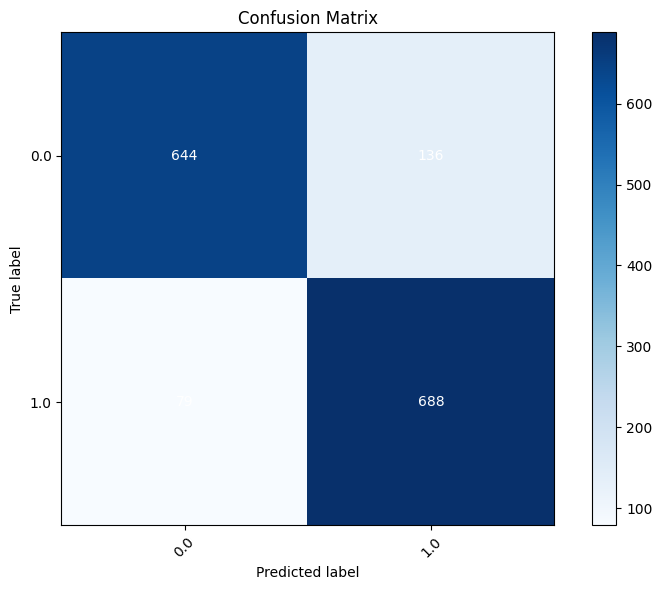

Confusion Matrix:
[[644 136]
 [ 79 688]]

ROC Values:
Class 1: AUC = 0.94


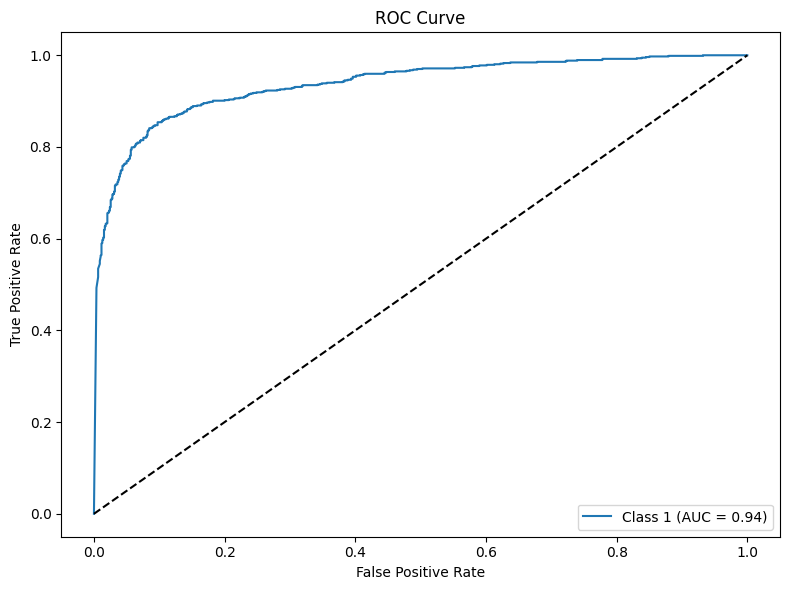

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import torch.nn.functional as F  # For softmax

# Load the trained model
model = CNN_GSGD(input_size=input_size, num_classes=len(full_dataset.classes)).to(device)
model.load_state_dict(torch.load('/content/bargraph_model.pth'))
model.eval()

# Get predictions and true labels for the test set
all_preds = []
all_labels = []
all_preds_prob = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, preds = torch.max(output, 1)  # Get predictions
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(target.cpu().numpy())
        all_preds_prob.extend(F.softmax(output, dim=1).cpu().numpy())  # Store probabilities

# Classification Report
print("Classification Report:")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
cf_matrix = confusion_matrix(all_labels, all_preds)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = list(full_dataset.classes)  # Assuming the class labels are present in the dataset
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add annotations to the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cf_matrix[i, j]), ha='center', va='center', color='white')

plt.tight_layout()
plt.show()  # Display confusion matrix plot

# Print Confusion Matrix values
print("Confusion Matrix:")
print(cf_matrix)

# Determine if it's binary or multi-class
is_binary = len(classes) == 2  # If there are only two classes, it's binary classification

# Compute ROC Curve and AUC
lb = LabelBinarizer()
all_labels_bin = lb.fit_transform(all_labels)  # Convert labels to binary format

fpr = dict()
tpr = dict()
roc_auc = dict()

if is_binary:
    # For binary classification, we only need the positive class (class 1)
    fpr, tpr, _ = roc_curve(all_labels_bin, np.array(all_preds_prob)[:, 1])  # Get probabilities for class 1
    roc_auc = auc(fpr, tpr)
else:
    # For multi-class classification, compute ROC for each class
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], np.array(all_preds_prob)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Print ROC values
print("\nROC Values:")
if is_binary:
    print(f'Class 1: AUC = {roc_auc:.2f}')
else:
    for i in range(len(classes)):
        print(f'Class {classes[i]}: AUC = {roc_auc[i]:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
if is_binary:
    plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})')
else:
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (no discrimination)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()  # Display ROC curve plot

HEATMAPS

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

# Path to the ZIP file
zip_file_path = '/content/drive/My Drive/Heatmaps/heatmaps.zip'
extract_path = '/content/heatmaps'

# Verify if the ZIP file exists
if not os.path.exists(zip_file_path):
    raise FileNotFoundError(f"File not found: {zip_file_path}")

# Copy the ZIP file to Colab
!cp "{zip_file_path}" /content

# Unzip the file
with zipfile.ZipFile('/content/heatmaps.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/drive


In [ ]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the path to the folder where your images are stored
data_path = '/content/heatmaps'  # Update this with the path to your images

# Step 1: Set up transformations (similar to MNIST preprocessing)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale if needed
    # transforms.Resize((28, 28)),  # Resize to 28x28 to match MNIST dimensions, adjust if needed
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to match MNIST-like preprocessing
])

# Step 2: Load the entire dataset using ImageFolder
full_dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Step 3: Get input size dynamically from the first image in the dataset
sample_image, _ = full_dataset[0]  # Take the first image to determine the input shape
input_size = sample_image.shape  # This will be (C, H, W)

# Step 4: Split the dataset into training and testing sets
train_size = int(0.8 * len(full_dataset))  # 80% for training
test_size = len(full_dataset) - train_size  # Remaining 20% for testing
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Step 5: Create DataLoaders for both sets
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Split the train_dataset into training and validation datasets
train_size = int(0.8 * len(train_dataset))  # 80% for training
validation_size = len(train_dataset) - train_size  # Remaining 20% for validation
train_dataset, validation_dataset = random_split(train_dataset, [train_size, validation_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_GSGD(input_size=input_size, num_classes=len(full_dataset.classes)).to(device)

# model = EnhancedCNN_GSGD(num_classes=len(full_dataset.classes)).to(device)
# For Standard Guided SGD
# optimizer = GSGDOptimizer(model.parameters(), lr=0.01, method='sgd')

# For Guided SGD with Momentum
optimizer = GSGDOptimizer(model.parameters(), lr=0.01, method='momentum', momentum=0.9)

# For Guided Adam
# optimizer = GSGDOptimizer(model.parameters(), lr=0.001, method='adam', beta1=0.9, beta2=0.999)

In [ ]:
# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Run training for each epoch, passing the dataset instead of DataLoader
for epoch in range(1, 30):
    train(model, device, train_loader.dataset, validation_loader.dataset, optimizer, epoch, loss_fn,
      verification_set_num=4, rho=10, log_interval=2)
    # train(model, device, train_loader.dataset, optimizer, epoch, loss_fn)  # Pass train_loader.dataset
    test(model, device, test_loader)

Epoch: 1, Iteration: 1, Loss: 0.692540
Epoch: 1, Iteration: 3, Loss: 0.691020
Epoch: 1, Iteration: 5, Loss: 0.675767
Epoch: 1, Iteration: 7, Loss: 0.656056
Epoch: 1, Iteration: 9, Loss: 0.638021
Epoch: 1, Iteration: 11, Loss: 0.581345
Epoch: 1, Iteration: 13, Loss: 0.494787
Epoch: 1, Iteration: 15, Loss: 0.483144
Epoch: 1, Iteration: 17, Loss: 0.610835
Epoch: 1, Iteration: 19, Loss: 0.376842
Epoch: 1, Iteration: 21, Loss: 0.690455
Epoch: 1, Iteration: 23, Loss: 0.414035
Epoch: 1, Iteration: 25, Loss: 0.479531
Epoch: 1, Iteration: 27, Loss: 0.573504
Epoch: 1, Iteration: 29, Loss: 0.434290
Epoch: 1, Iteration: 31, Loss: 0.445731
Epoch: 1, Iteration: 33, Loss: 0.472264
Epoch: 1, Iteration: 35, Loss: 0.442028
Epoch: 1, Iteration: 37, Loss: 0.468631
Epoch: 1, Iteration: 39, Loss: 0.344348
Epoch: 1, Iteration: 41, Loss: 0.386725
Epoch: 1, Iteration: 43, Loss: 0.361739
Epoch: 1, Iteration: 45, Loss: 0.541337
Epoch: 1, Iteration: 47, Loss: 0.408847
Epoch: 1, Iteration: 49, Loss: 0.412136
Epoch

In [ ]:
# Save the trained model
model_save_path = '/content/heatmaps_model.pth'  # Path where you want to save the model
torch.save(model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')

Model saved to /content/heatmaps_model.pth


<ipython-input-8-eac103c8114b>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/heatmaps_model.pth'))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       761
           1       0.97      0.89      0.93       786

    accuracy                           0.93      1547
   macro avg       0.93      0.93      0.93      1547
weighted avg       0.93      0.93      0.93      1547



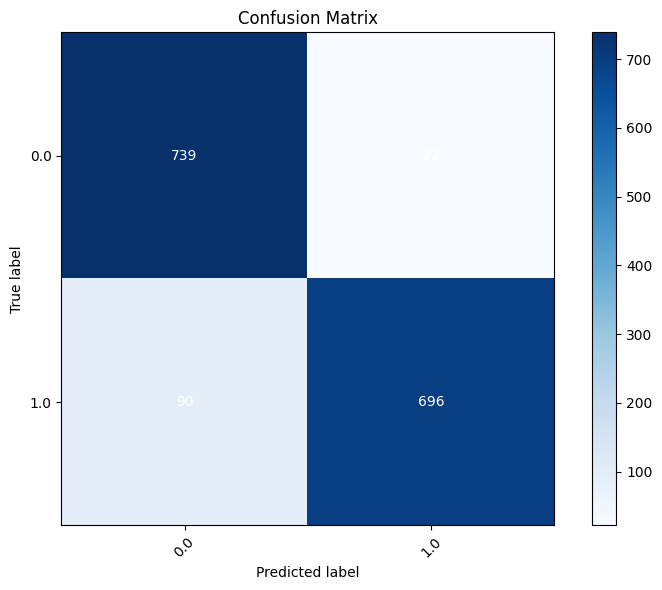

Confusion Matrix:
[[739  22]
 [ 90 696]]

ROC Values:
Class 1: AUC = 0.98


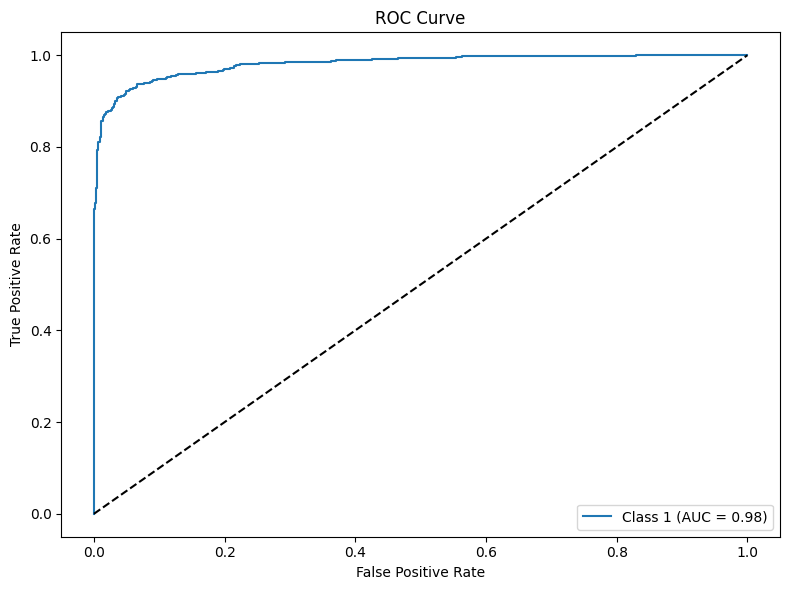

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import torch.nn.functional as F  # For softmax

# Load the trained model
model = CNN_GSGD(input_size=input_size, num_classes=len(full_dataset.classes)).to(device)
model.load_state_dict(torch.load('/content/heatmaps_model.pth'))
model.eval()

# Get predictions and true labels for the test set
all_preds = []
all_labels = []
all_preds_prob = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, preds = torch.max(output, 1)  # Get predictions
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(target.cpu().numpy())
        all_preds_prob.extend(F.softmax(output, dim=1).cpu().numpy())  # Store probabilities

# Classification Report
print("Classification Report:")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
cf_matrix = confusion_matrix(all_labels, all_preds)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = list(full_dataset.classes)  # Assuming the class labels are present in the dataset
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add annotations to the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cf_matrix[i, j]), ha='center', va='center', color='white')

plt.tight_layout()
plt.show()  # Display confusion matrix plot

# Print Confusion Matrix values
print("Confusion Matrix:")
print(cf_matrix)

# Determine if it's binary or multi-class
is_binary = len(classes) == 2  # If there are only two classes, it's binary classification

# Compute ROC Curve and AUC
lb = LabelBinarizer()
all_labels_bin = lb.fit_transform(all_labels)  # Convert labels to binary format

fpr = dict()
tpr = dict()
roc_auc = dict()

if is_binary:
    # For binary classification, we only need the positive class (class 1)
    fpr, tpr, _ = roc_curve(all_labels_bin, np.array(all_preds_prob)[:, 1])  # Get probabilities for class 1
    roc_auc = auc(fpr, tpr)
else:
    # For multi-class classification, compute ROC for each class
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], np.array(all_preds_prob)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Print ROC values
print("\nROC Values:")
if is_binary:
    print(f'Class 1: AUC = {roc_auc:.2f}')
else:
    for i in range(len(classes)):
        print(f'Class {classes[i]}: AUC = {roc_auc[i]:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
if is_binary:
    plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})')
else:
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (no discrimination)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()  # Display ROC curve plot